In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

In [2]:
def projection(X, y):
    fig, axs = plt.subplots(2,3)
    fig.set_size_inches(18.5, 10.5)
    comb = list(combinations((0,1,2,3), 2))
    col_names = ["sepal length", "sepal width", "petal length", "petal width"]
    for i in range(2):
        for j in range(3):
            axs[i][j].scatter(X[:,comb[i*3+j][0]], X[:,comb[i*3+j][1]],
                             c = y)
            axs[i][j].set_title(f"projection on {col_names[comb[i*3+j][0]]} and {col_names[comb[i*3+j][1]]}")
            axs[i][j].set_xlabel(col_names[comb[i*3+j][0]])
            axs[i][j].set_ylabel(col_names[comb[i*3+j][1]])
    plt.show()


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

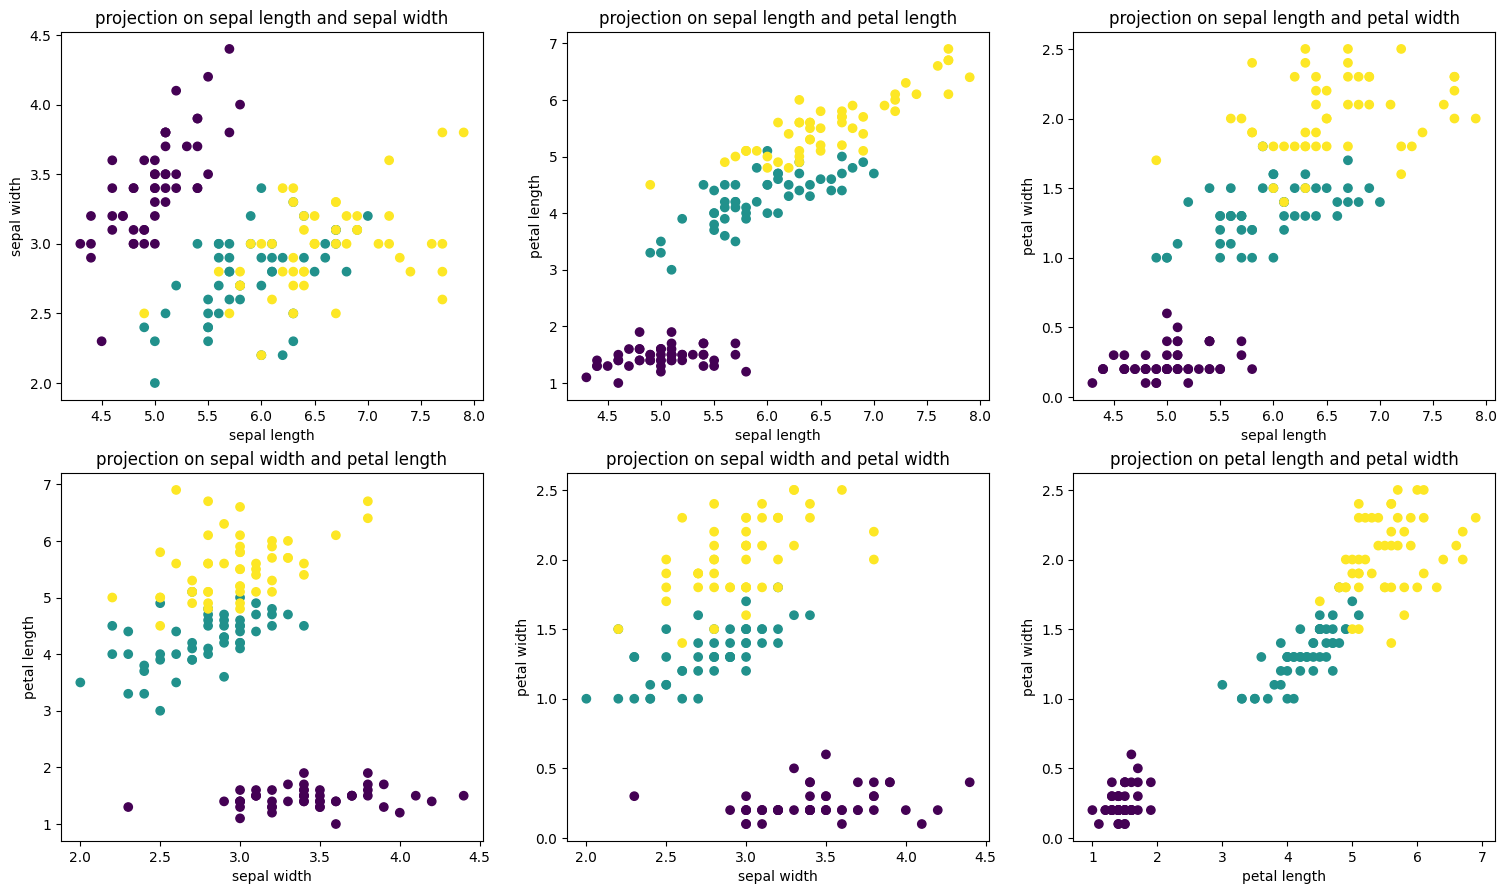

In [3]:
print(load_iris())
X = load_iris()['data']
y = load_iris()['target']
projection(X, y)

In [4]:
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [5]:
X.std(axis=0)

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

# Нормализация
Вычитание среднего и деление на стандартное отклонение

In [6]:
class Normalizer:
    def __init__(self):
        self.m = 0
        self.std = 1

    def fit(self, X):
        self.std = X.std(axis=0)
        self.m = X.mean(axis=0)

    def transform(self, X):
        return (X-self.m)/self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [7]:
normalizer = Normalizer()
X_ = normalizer.fit_transform(X)

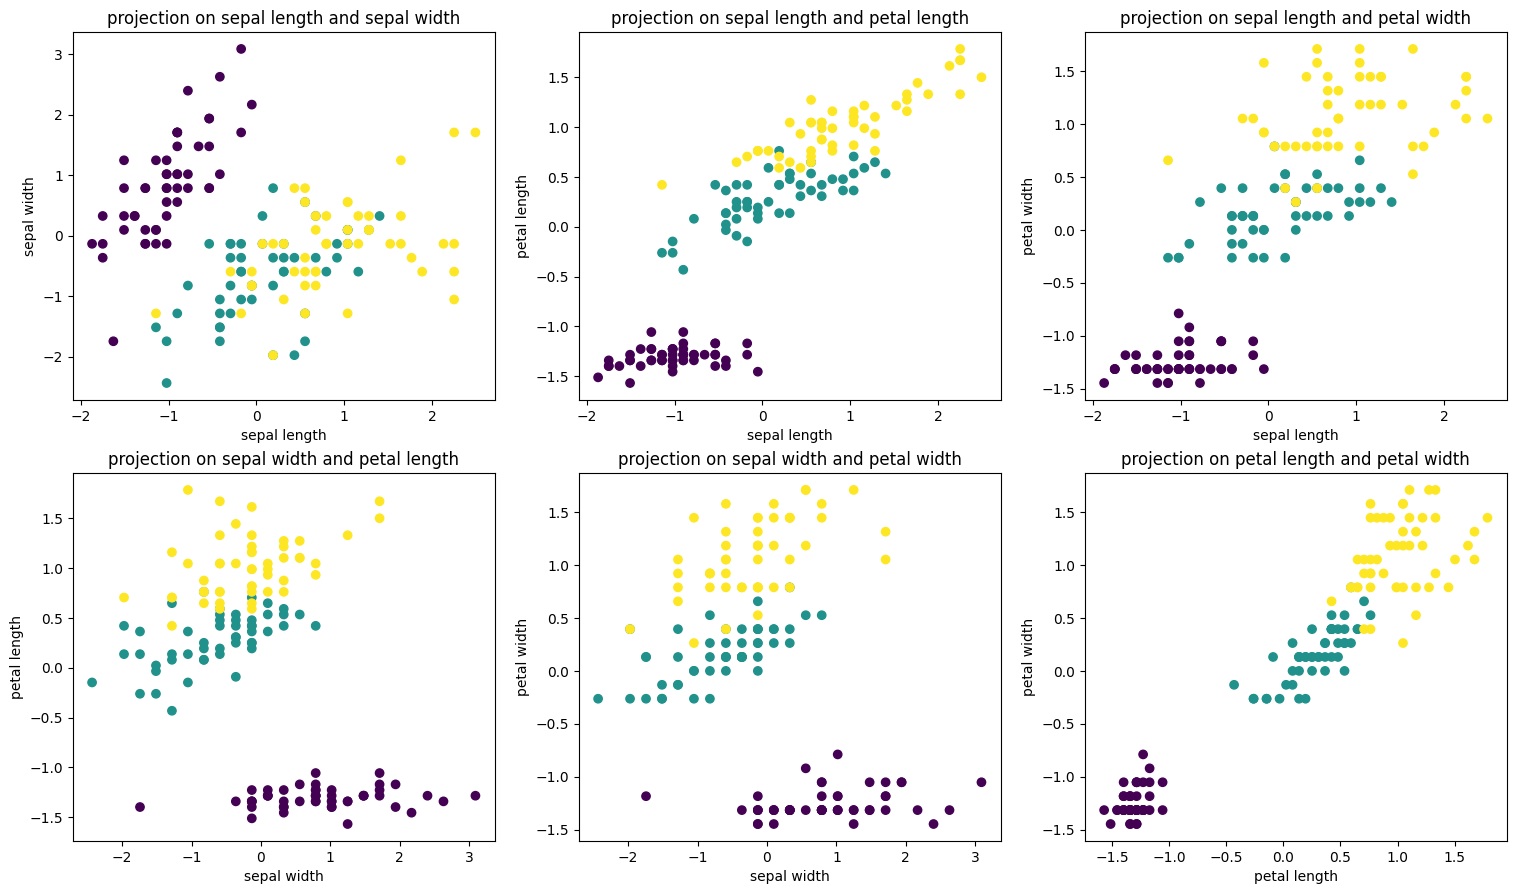

In [8]:
projection(X_, y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_model = None
best_accuracy = 0
best_k = -1

X_train_transformed = normalizer.fit_transform(X_train)
X_test_transformed = normalizer.transform(X_test)

for k in range(3, 14):
    curr_model = KNeighborsClassifier(n_neighbors=k)
    curr_model.fit(X_train_transformed, y_train)
    preds = curr_model.predict(X_test_transformed)
    acc = accuracy_score(y_test, preds)
    if acc > best_accuracy:
        best_model = curr_model
        best_accuracy = acc
        best_k = k

In [11]:

print(best_accuracy, best_k)


1.0 3


Трех соседей достаточно для 100% точности

In [12]:
n = int(input("Скольким объектам вы хотите определить класс?\t"))
new_data = np.array([list(map(float, input("введите характеристики через пробел():\t").split())) for _ in range(n)])


Скольким объектам вы хотите определить класс?	3
введите характеристики через пробел():	5 4 3 2
введите характеристики через пробел():	2 4 1 5
введите характеристики через пробел():	5 3 1 4


In [13]:
new_data

array([[5., 4., 3., 2.],
       [2., 4., 1., 5.],
       [5., 3., 1., 4.]])

In [14]:
norm_new_data = normalizer.transform(new_data)
norm_new_data

array([[-0.98634915,  2.09801686, -0.41642124,  1.09012776],
       [-4.64325641,  2.09801686, -1.56253475,  5.09467873],
       [-0.98634915, -0.13788033, -1.56253475,  3.75982841]])

In [15]:
for inp, prd in zip(new_data, best_model.predict(norm_new_data)):
    print(f'Class for iris {inp} is {prd}')

Class for iris [5. 4. 3. 2.] is 0
Class for iris [2. 4. 1. 5.] is 2
Class for iris [5. 3. 1. 4.] is 2
